# Make an Excel Ray file for Beam4


- Geometry : Auxiliary Telescope Geometry (AuxTel)

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS  -> IJCLAb/IN2P3/CNRS
- date : January 14th 2017
- update : Jun  6 th 2018
- update : May 16th 2020


Simple 2D optical geometry for the optical setup of CTIO 0.9m telescope with Ronchi Grating.
This is a tool to adjust the CCD position wrt Filter wheel to obtained a


This is a python notebook (not a sagemath notebook)
- command:
** ipython notebook **

In [149]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib as mpl
import pandas as pd
import itertools

In [150]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

## Output filename and desired wavelength

In [151]:
root_filename="Beam4_Rayfile_"

In [152]:
# number of rays
NBEAM_X=11
NBEAM_Y=11
NBEAM=NBEAM_X*NBEAM_Y

In [153]:
Wavelength=0.4
WL=int(1000.*Wavelength)
NWL=1

In [154]:
Wavelength_B=0.0004
Wavelength_G=0.0006
Wavelength_R=0.0008
Wavelength_I=0.001

In [155]:
#theta_x=0.045*60.  # target offset in arcmin
theta_x=0
theta_y=0 # angle in arcmin 

In [156]:
theta_x_num=int(theta_x*10)
theta_y_num=int(theta_y*10)

In [157]:
if theta_x_num>0:
    theta_nstr='{:0>2}'.format(theta_x_num)
    theta_x_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_x_num)
    theta_x_str="m"+theta_nstr

In [158]:
if theta_y_num>0:
    theta_nstr='{:0>2}'.format(theta_y_num)
    theta_y_str="p"+theta_nstr
else:
    theta_nstr='{:0>2}'.format(-theta_y_num)
    theta_y_str="m"+theta_nstr

In [159]:
Beam4_Rayfile_EXCEL="Beam4_Rayfile_{:d}_allwl_{}_{}.xlsx".format(NBEAM*NWL,theta_x_str,theta_y_str)
Beam4_Rayfile_RAY="Beam4_Rayfile_{:d}_allwl_{}_{}.RAY".format(NBEAM*NWL,theta_x_str,theta_y_str)

In [160]:
Beam4_Rayfile_RAY

'Beam4_Rayfile_121_allwl_m00_m00.RAY'

## Constants for conversions

In [161]:
m_to_mm=1000.
mm_to_m=1e-3
inch_to_mm=25.4
mm_to_inch=1./inch_to_mm
micr_to_m=1e-6
micr_to_mm=1e-3
m_to_micr=1./micr_to_m
m_to_cm=100.
m_to_nm=1e9
nm_to_m=1./m_to_nm

In [162]:
arcdeg_to_arcmin=60.
arcmin_to_arcdeg=1./arcdeg_to_arcmin
arcmin_to_arcsec=60.
arcsec_to_arcmin=1./arcmin_to_arcsec
arcdeg_to_arcsec=arcdeg_to_arcmin*arcmin_to_arcsec
arcsec_to_arcdeg=1./arcdeg_to_arcsec

In [163]:
deg_to_rad=np.pi/180.
rad_to_deg=1./deg_to_rad
rad_to_arcsec=rad_to_deg*arcdeg_to_arcsec
rad_to_arcmin=rad_to_deg*arcdeg_to_arcmin
arcmin_to_rad=1./rad_to_arcmin
arcsec_to_rad=1./rad_to_arcsec

## Configuration parameters at the telescope
--------------------------------------------------------

#### Telescope

In [164]:
Tel_Focal_Length=21.6 # m : Focal length of the telescope
Tel_Diameter=1.2 # m : Diameter of the telescope    

In [165]:
Tel_Fnum=Tel_Focal_Length/Tel_Diameter

In [166]:
print("Aperture/D =  {} ".format(Tel_Fnum))

Aperture/D =  18.000000000000004 


In [167]:
alpha=Tel_Diameter/2./Tel_Focal_Length

In [168]:
print("Beam half angle alpha= {} degree".format(alpha*rad_to_deg))

Beam half angle alpha= 1.5915494309189533 degree


#### Filter

In [169]:
Filt_D=0.265 # m distance of the rotator plane wrt CCD plane
Filt_size=3*inch_to_mm

In [170]:
Filt_size

76.19999999999999

#### Hologram

In [171]:
#Holo_D=-0.190 # m distance to the CCD plane
Holo_D=-0.200 # m distance to the CCD plane

#### CCD Detector

In [172]:
Det_xpic=10.0 # microns per pixel
Det_NbPix=4096 # number of pixels per CCD side
Det_size=Det_xpic*Det_NbPix*micr_to_mm # CCD size in mm, 5 cm or 2 inches

In [173]:
print('Detecteur size = {} mm'.format(Det_size))

Detecteur size = 40.96 mm


In [174]:
Det_pix_angl=Det_xpic*micr_to_m/Tel_Focal_Length   # in radian

In [175]:
print("pixel viewing angle = {} arcsec ".format(Det_pix_angl*rad_to_arcsec))

pixel viewing angle = 0.0954929658551372 arcsec 


In [176]:
fov =Det_pix_angl*Det_NbPix*rad_to_arcmin

In [177]:
print('Full FOV = {} arcmin'.format(fov))

Full FOV = 6.518986469044032 arcmin


## Location of the source in the field of view

The Field of view of the telescope is +/- 30 arcmin


- ($\theta_x, \theta_y$) in arcmin to be specified
- ($\alpha_x, \alpha_y$) in radian calculated 

In [178]:
theta_fov_max=30.
theta_fov_min=-30.

### Off axis angle in radian

In [179]:
theta_x=theta_x*arcmin_to_rad
theta_y=theta_y*arcmin_to_rad

In [180]:
print('theta_x = {} rad '.format(theta_x))
print('theta_y = {} rad '.format(theta_y))

theta_x = 0.0 rad 
theta_y = 0.0 rad 


### Angles of upper (1) and lower (2) rays

In [181]:
#tan_beta1_x=np.tan(alpha)+np.tan(theta_x)
#tan_beta2_x=np.tan(alpha)-np.tan(theta_x)
tan_beta1_x=np.tan(alpha+theta_x)
tan_beta2_x=np.tan(alpha-theta_x)

In [182]:
print('beta1_x = {} rad '.format(tan_beta1_x))
print('beta2_x = {} rad '.format(tan_beta2_x))

beta1_x = 0.02778492447372542 rad 
beta2_x = 0.02778492447372542 rad 


In [183]:
#tan_beta1_y=np.tan(alpha)+np.tan(theta_y)
#tan_beta2_y=np.tan(alpha)-np.tan(theta_y)
tan_beta1_y=np.tan(alpha+theta_y)
tan_beta2_y=np.tan(alpha-theta_y)

In [184]:
print('beta1_y = {} rad '.format(tan_beta1_y))
print('beta2_y = {} rad '.format(tan_beta2_y))

beta1_y = 0.02778492447372542 rad 
beta2_y = 0.02778492447372542 rad 


In [185]:
beta1_x=np.arctan(tan_beta1_x)
beta2_x=np.arctan(tan_beta2_x)
beta1_y=np.arctan(tan_beta1_y)
beta2_y=np.arctan(tan_beta2_y)

## Where to start the tracking of rays

- Units in mm
- The origin is where the optical effective converging system start at O(0,0,0)
- (X0,Y0,Z0) : coordinates of Beam rays starting points

### Z coordinate where the beam start

- the Z origin is that of Focal Point

In [186]:
Z00=-Filt_D*m_to_mm  # distance between plane where the trcking beam start. Origin in Z at FP

In [187]:
Z00

-265.0

### (X,Y) coordinate of the focal point of the inclined beam in the focal plane

- notice $(X0P,Y0P)$ will be used as the origin of the new coordinate system

In [188]:
X0P=-Tel_Focal_Length*m_to_mm*np.tan(theta_x)
Y0P=-Tel_Focal_Length*m_to_mm*np.tan(theta_y)

In [189]:
print("Coordinate of central ray at in focal plane ({:2.2f},{:2.0f}) in mm".format(X0P,Y0P))

Coordinate of central ray at in focal plane (-0.00,-0) in mm


### (X,Y) coordinate of central ray where the beam tracking start

- notice $(X0P,Y0P)$ will be used as the origin of the new coordinate system

In [190]:
X00=X0P-Z00*np.sin(theta_x)  # central beam
Y00=Y0P-Z00*np.sin(theta_y)  # central beam

In [191]:
print("Coordinate of central ray where tracking start ({:2.2f},{:2.0f}) in mm".format(X00,Y00))

Coordinate of central ray where tracking start (0.00, 0) in mm


### X-up, X-down position where the beam start

- notice $(X0P,Y0P)$ will be used as the origin of the new coordinate system

In [192]:
X01=X0P-Z00*np.sin(beta1_x)
X02=X0P+Z00*np.sin(beta2_x)

In [193]:
print("X01= {} mm , X00 = {} mm , X02= {} mm".format( X01, X00, X02))

X01= 7.36016450268482 mm , X00 = 0.0 mm , X02= -7.36016450268482 mm


In [194]:
Y01=Y0P-Z00*np.sin(beta1_y)
Y02=Y0P+Z00*np.sin(beta2_y)

In [195]:
print("Y01= {} mm , Y00 = {} mm , Y02= {} mm".format( Y01, Y00, Y02))

Y01= 7.36016450268482 mm , Y00 = 0.0 mm , Y02= -7.36016450268482 mm


In [196]:
XMIN=X02
XMAX=X01

In [197]:
YMIN=Y02
YMAX=Y01

# Populate the starting tracking surface uniformily with a square beam rays

In [198]:
X = np.linspace(XMIN, XMAX, NBEAM_X)
Y = np.linspace(YMIN, YMAX, NBEAM_Y)
XX, YY = np.meshgrid(X, Y)

## coordinates of rays where tracking start

In [199]:
XX0=XX
YY0=YY

In [200]:
pts = itertools.product(X, Y)

Text(0.5, 1.0, 'Impact points where the tracking start')

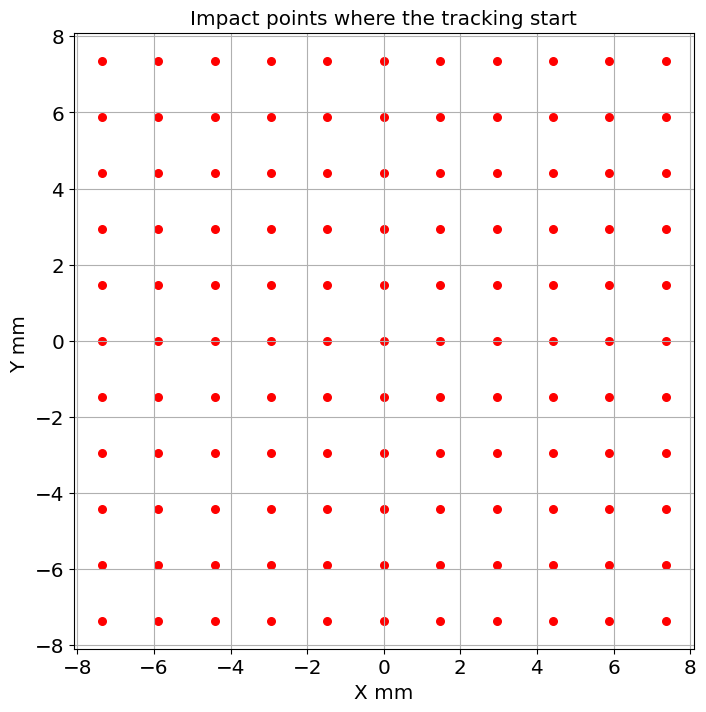

In [201]:
plt.grid()
plt.scatter(*zip(*pts), marker='o', s=30, color='red')
plt.xlabel("X mm")
plt.ylabel("Y mm ")
plt.title("Impact points where the tracking start")

Text(0.5, 1.0, 'Impact points where the tracking start')

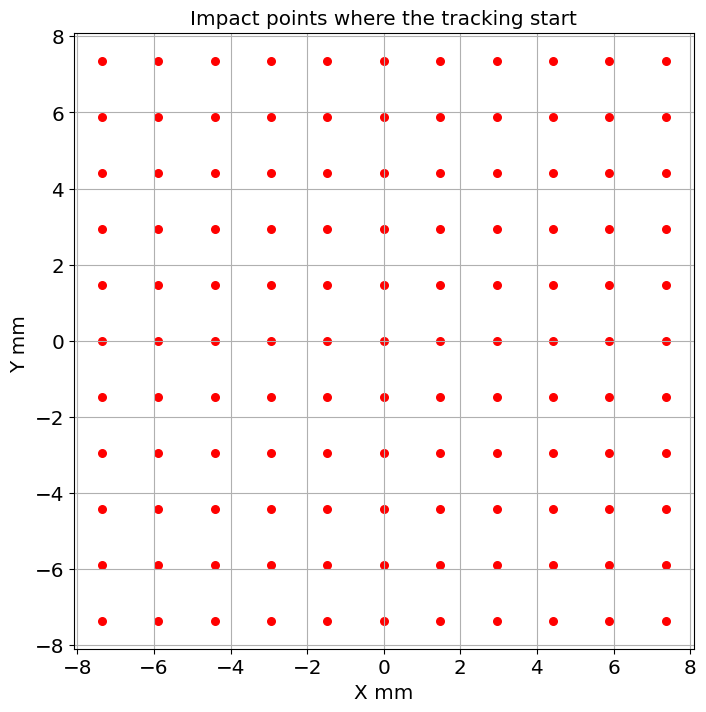

In [202]:
plt.scatter(XX,YY, marker='o', s=30, color='red')
#plt.ylim(YMIN,YMAX)
#plt.xlim(XMIN,XMAX)
plt.grid()
plt.xlabel("X mm")
plt.ylabel("Y mm ")
plt.title("Impact points where the tracking start")

## Check the beam is converging

In [203]:
def GetCosinusDirector(X,Y,Z,X0,Y0):
    """   
    Compute the cosinus director of each beam
    
    input :
     X,Y,Z : the coordinate of the beam rays point (where the tracking start)
             The size of X,Y,Z is the number of Rays
             
     X0,Y0 : the center of the beam (where the tracking start)
     
     output :
     UX,UY,UZ : cosinus director of beam rays
     
    """
    
    DeltaX=X0-X
    DeltaY=Y0-Y
    DeltaZ=-Z
    
    
    Norm=np.sqrt( np.power(DeltaX,2) + np.power(DeltaY,2)+ DeltaZ**2)
    UX=DeltaX/Norm
    UY=DeltaY/Norm
    UZ=DeltaZ/Norm
    return UX,UY,UZ    

In [204]:
# Z00 coordinate where the tracking start
# (X0P,Y0P) coordinate of the Focal point in Focal plane
# (XX0,YY0,Z00) are the coordinate of rays at tracking start plane , in telescope reference coordinate system
UX,UY,UZ=GetCosinusDirector(XX0,YY0,Z00,X0P,Y0P)

Text(0.5, 1.0, 'Vector field')

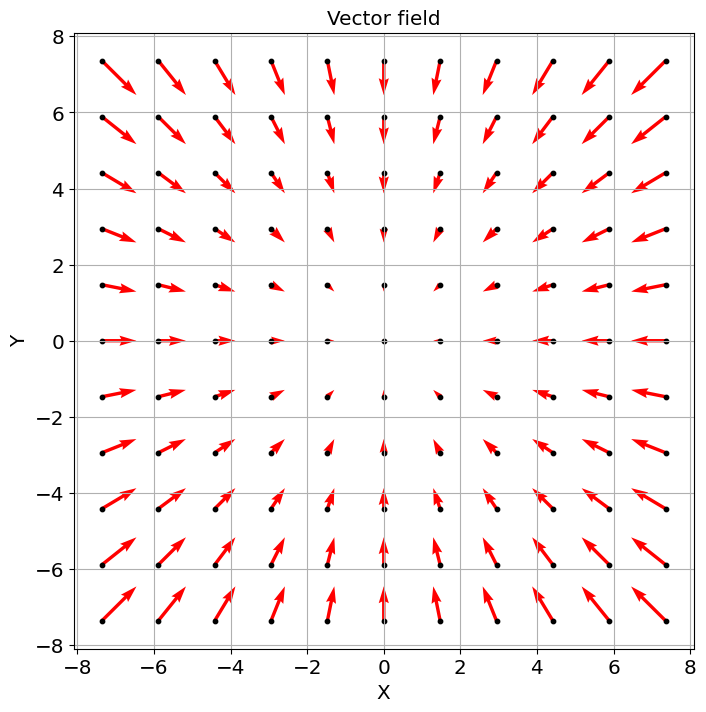

In [205]:
plt.grid()
q = plt.quiver(XX0,YY0,UX,UY,angles='xy',scale=0.5,color='r')
plt.scatter(XX0,YY0, marker='o', s=10, color='black')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Vector field")

## Check beam at hologram position

In [206]:
def GetPointPosition(X,Y,DeltaZ,UX,UY,UZ):
    k=DeltaZ/UZ
    theX0=X+k*UX
    theY0=Y+k*UY
    return theX0,theY0

In [207]:
Z1=-Holo_D*m_to_mm  # distance between p

In [208]:
DeltaZ=Z1-Z00

In [209]:
(X1,Y1)=GetPointPosition(XX0,YY0,DeltaZ,UX,UY,UZ)

Text(0.5, 1.0, 'Beam Impact point at the Hologram')

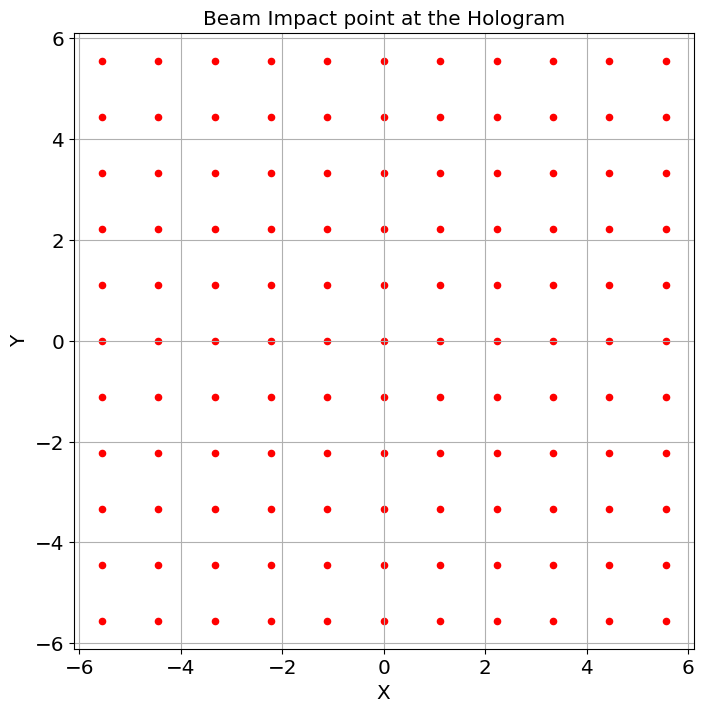

In [210]:
plt.scatter(X1,Y1, marker='o', s=20, color='red')
plt.grid()
#plt.ylim(YMIN,YMAX)
#plt.xlim(XMIN,XMAX)

#plt.xlim(-Filt_size/2, Filt_size/2)
#plt.ylim(-Filt_size/2, Filt_size/2)

plt.xlabel("X")
plt.ylabel("Y")
plt.title("Beam Impact point at the Hologram")

## Check convergence

In [211]:
Xout=XX0.flatten()
Yout=YY0.flatten()

In [212]:
Uout=UX.flatten()
Vout=UY.flatten()
Wout=UZ.flatten()

In [213]:
Zout=np.zeros(NBEAM)+Z00

### Beam in X-Z plane

Text(0.5, 1.0, 'Converging Beam X vs Z')

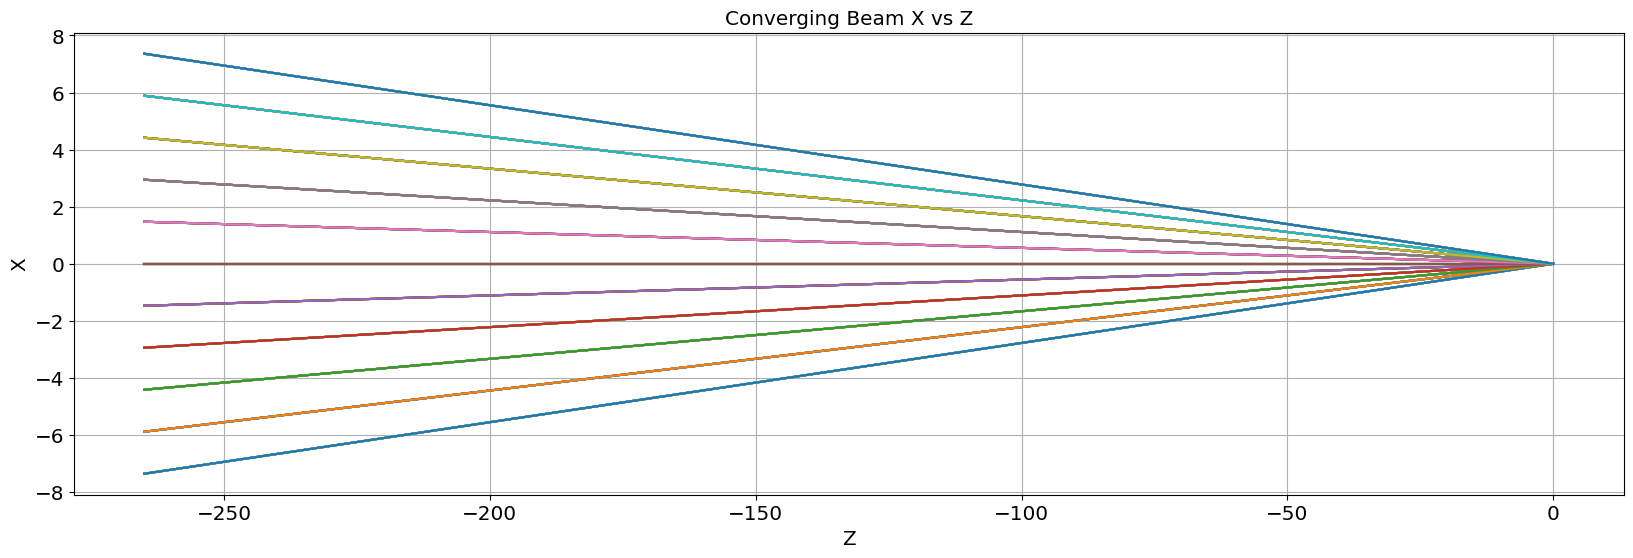

In [214]:
plt.figure(figsize=(20,6))
for idx in np.arange(NBEAM):
    Xfinal=Xout[idx]-Zout[idx]*Uout[idx]/Wout[idx]
    plt.plot([Zout[idx],0],[Xout[idx],Xfinal])
plt.grid()
plt.ylabel("X")
plt.xlabel("Z")
plt.title("Converging Beam X vs Z")

### Beam in Y-Z plane

Text(0.5, 1.0, 'Converging Beam Y vs Z')

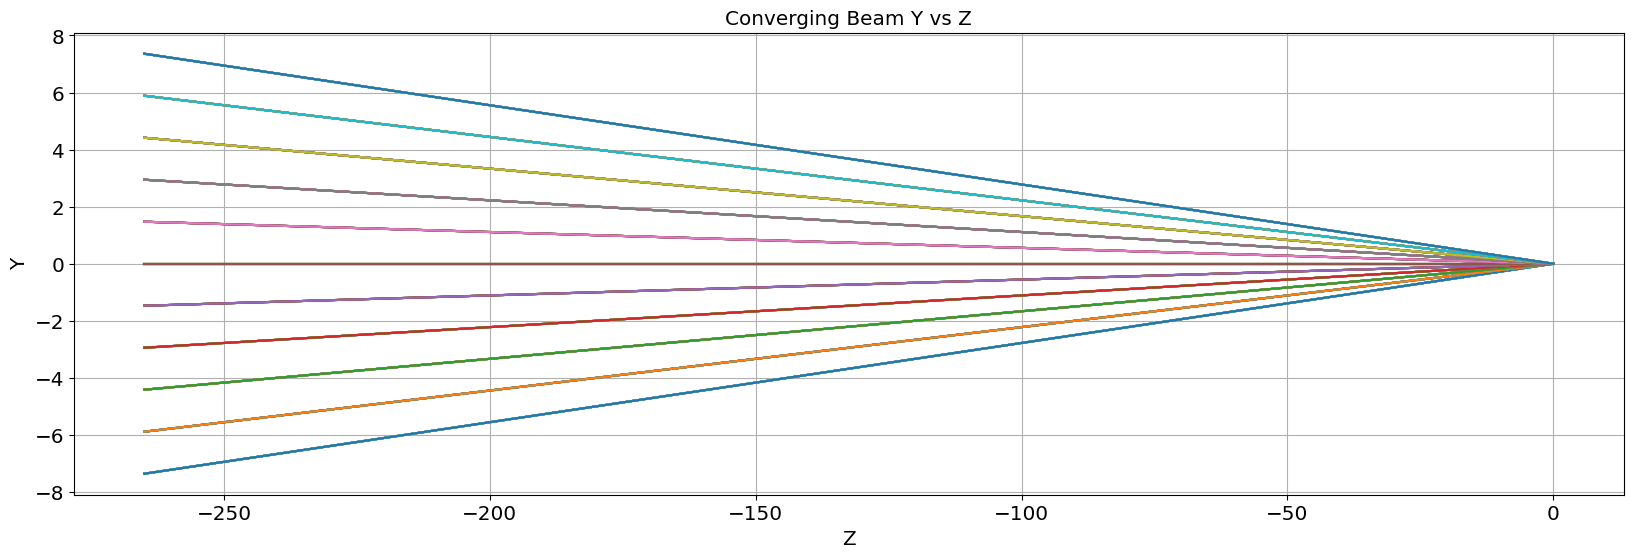

In [215]:
plt.figure(figsize=(20,6))
for idx in np.arange(NBEAM):
    Yfinal=Yout[idx]-Zout[idx]*Vout[idx]/Wout[idx]
    plt.plot([Zout[idx],0],[Yout[idx],Yfinal])
plt.grid()
plt.ylabel("Y")
plt.xlabel("Z")
plt.title("Converging Beam Y vs Z")

# Create dataframe

In [216]:
df = pd.DataFrame()

In [217]:
Wave=Wavelength*np.ones(NBEAM)

In [218]:
wave_b=Wavelength_B*np.ones(NBEAM)
color_b = np.chararray(NBEAM)
color_b[:]='b'

In [219]:
wave_g=Wavelength_G*np.ones(NBEAM)
color_g = np.chararray(NBEAM)
color_g[:]='g'

In [220]:
wave_r=Wavelength_R*np.ones(NBEAM)
color_r = np.chararray(NBEAM)
color_r[:]='r'

In [221]:
wave_i=Wavelength_I*np.ones(NBEAM)
color_i = np.chararray(NBEAM)
color_i[:]='k'

In [222]:
if Wavelength==Wavelength_B:
    allcolor=color_b
elif Wavelength==Wavelength_G:
    allcolor=color_g
elif Wavelength==Wavelength_R:
    allcolor=color_r
else:
    allcolor=color_i

In [223]:
df["X0"]=Xout
df["Y0"]=Yout
df["Z0"]=Zout
df["U0"]=Uout
df["V0"]=Vout
df["W0"]=Wout
df["wave"]=Wave
df["col"]=allcolor
df["X1"]= np.zeros(NWL*NBEAM) 
df["Y1"]= np.zeros(NWL*NBEAM) 
df["Z1"]= np.zeros(NWL*NBEAM) 
df["X2"]= np.zeros(NWL*NBEAM) 
df["Y2"]= np.zeros(NWL*NBEAM) 
df["Z2"]= np.zeros(NWL*NBEAM) 
df["X3"]= np.zeros(NWL*NBEAM) 
df["Y3"]= np.zeros(NWL*NBEAM) 
df["Z3"]= np.zeros(NWL*NBEAM)
df["Xgoal"]= np.zeros(NWL*NBEAM)   # required for AutoAdjust
df["Ygoal"]= np.zeros(NWL*NBEAM) 
df["Xfinal"]= np.zeros(NWL*NBEAM) 
df["Yfinal"]= np.zeros(NWL*NBEAM) 
df["Zfinal"]= np.zeros(NWL*NBEAM)

In [224]:
df

,X0,Y0,Z0,U0,V0,W0,wave,col,X1,Y1,...,Y2,Z2,X3,Y3,Z3,Xgoal,Ygoal,Xfinal,Yfinal,Zfinal
0,-7.360165,-7.360165,-265.0,0.027753,0.027753,0.999229,0.4,b'k',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-5.888132,-7.360165,-265.0,0.022205,0.027757,0.999368,0.4,b'k',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-4.416099,-7.360165,-265.0,0.016656,0.027760,0.999476,0.4,b'k',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-2.944066,-7.360165,-265.0,0.011105,0.027762,0.999553,0.4,b'k',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.472033,-7.360165,-265.0,0.005553,0.027763,0.999599,0.4,b'k',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,1.472033,7.360165,-265.0,-0.005553,-0.027763,0.999599,0.4,b'k',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
117,2.944066,7.360165,-265.0,-0.011105,-0.027762,0.999553,0.4,b'k',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
118,4.416099,7.360165,-265.0,-0.016656,-0.027760,0.999476,0.4,b'k',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
119,5.888132,7.360165,-265.0,-0.022205,-0.027757,0.999368,0.4,b'k',0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [225]:
df.to_excel(Beam4_Rayfile)

NameError: name 'Beam4_Rayfile' is not defined